**Analysis by regions: Northern, Central and Southern Strait of Georgia**

In [2]:
%matplotlib inline
import sys
import random
import xarray as xr
import numpy as np
import os
import yaml
import math
from datetime import datetime, timedelta
from parcels import FieldSet, Field, VectorField, ParticleSet, JITParticle, ParcelsRandom, Variable, Kernel, AdvectionRK4

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors
from cartopy import crs, feature
import zarr 
import glob

sys.path.append('/ocean/vvalenzuela/MOAD/Ocean_Parcels')

from OP_functions import *
import cmocean
cmap = cmocean.cm.deep

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Check transect on GridX and GridY map to get latitudes and longitudes for Ocean Parcels coordinates

In [3]:
path = {'NEMO': '/results2/SalishSea/nowcast-green.202111/',
'coords': '/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc',
'coordsWW3': '/ocean/vvalenzuela/MOAD/grid2/WW3_grid.nc',
'mask': '/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc',
'bat': '/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc',
'out': '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Test_runs',
'home': '/home/vvalenzuela/MOAD/Ocean_Parcels',
'anim': '/home/vvalenzuela/MOAD/Ocean_Parcels/results/PBDE_runs/animations'}
#
coords = xr.open_dataset(path['coords'], decode_times=False)
mask = xr.open_dataset(path['mask'])
bathy = xr.open_dataset(path['bat'])

In [4]:
# Northern Strait
x1_1, y1_1 = [120,190], [720,720]
x1_2, y1_2 = [110,250], [555,555]
x1_3, y1_3 = [220,250], [632,555]
# Southern Strait
x2_1, y2_1 = [202,292], [505,505]
x2_2, y2_2 = [300,320], [503,457]
x2_3, y2_3 = [210,238], [500,465]
x2_4, y2_4 = [238,245], [465,410]
x2_5, y2_5 = [245,280], [410,350]
x2_6, y2_6 = [280,342], [350,315]
x2_7, y2_7 = [320,302], [457,410]
x2_8, y2_8 = [302,370], [410,390]

# JdF
x3_1, y3_1 = [155,155], [225,320]
x3_2, y3_2 = [155,10], [320,480]
x3_3, y3_3 = [155,10], [225,320]

# Puget Sound
x4, y4 = [203,312], [230,230]
# Haro Strait
x5_1, y5_1 = [200, 250],[305,300]
x5_2, y5_2 = [225, 242],[355,355]
x5_3, y5_3 = [244, 247],[355,320]

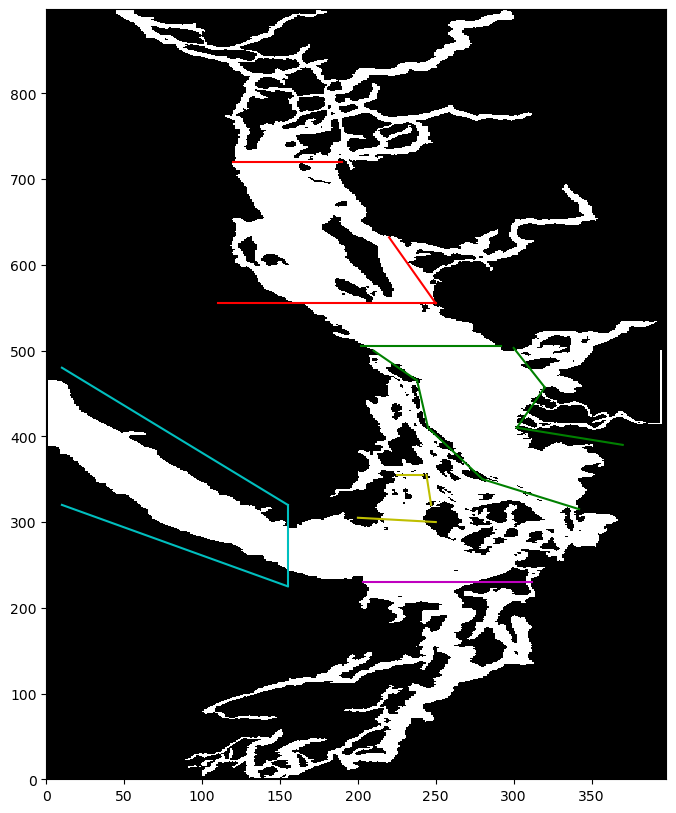

In [5]:
fig, ax = plt.subplots(figsize = (8,10))
ax.pcolormesh(mask['tmask'][0][0], cmap = 'grey')
ax.plot(x1_1, y1_1, 'r')
ax.plot(x1_2, y1_2, 'r')
ax.plot(x1_3, y1_3, 'r')

#
ax.plot(x2_1, y2_1, 'g')
ax.plot(x2_2, y2_2, 'g')
ax.plot(x2_3, y2_3, 'g')
ax.plot(x2_4, y2_4, 'g')
ax.plot(x2_5, y2_5, 'g')
ax.plot(x2_6, y2_6, 'g')
ax.plot(x2_7, y2_7, 'g')
ax.plot(x2_8, y2_8, 'g')







ax.plot(x3_1, y3_1, 'c')
ax.plot(x3_2, y3_2, 'c')
ax.plot(x3_3, y3_3, 'c')

ax.plot(x4, y4, 'm')
ax.plot(x5_1, y5_1, 'y')
ax.plot(x5_2, y5_2, 'y')
ax.plot(x5_3, y5_3, 'y')


Now, lets find these grid points as longitudes and latitudes

In [6]:
# Northern Strait
NSoG_lon_1, NSoG_lat_1 = [mask.nav_lon[y1_1[0],x1_1[0]].values, mask.nav_lon[y1_1[1],x1_1[1]].values], [mask.nav_lat[y1_1[0],x1_1[0]].values, mask.nav_lat[y1_1[1],x1_1[1]].values]
NSoG_lon_2, NSoG_lat_2 = [mask.nav_lon[y1_2[0],x1_2[0]].values, mask.nav_lon[y1_2[1],x1_2[1]].values], [mask.nav_lat[y1_2[0],x1_2[0]].values, mask.nav_lat[y1_2[1],x1_2[1]].values]
NSoG_lon_3, NSoG_lat_3 = [mask.nav_lon[y1_3[0],x1_3[0]].values, mask.nav_lon[y1_3[1],x1_3[1]].values], [mask.nav_lat[y1_3[0],x1_3[0]].values, mask.nav_lat[y1_3[1],x1_3[1]].values]
#
# Southern Strait
SSoG_lon_1, SSoG_lat_1 = [mask.nav_lon[y2_1[0],x2_1[0]].values, mask.nav_lon[y2_1[1],x2_1[1]].values], [mask.nav_lat[y2_1[0],x2_1[0]].values, mask.nav_lat[y2_1[1],x2_1[1]].values]
SSoG_lon_2, SSoG_lat_2 = [mask.nav_lon[y2_2[0],x2_2[0]].values, mask.nav_lon[y2_2[1],x2_2[1]].values], [mask.nav_lat[y2_2[0],x2_2[0]].values, mask.nav_lat[y2_2[1],x2_2[1]].values]
SSoG_lon_3, SSoG_lat_3 = [mask.nav_lon[y2_3[0],x2_3[0]].values, mask.nav_lon[y2_3[1],x2_3[1]].values], [mask.nav_lat[y2_3[0],x2_3[0]].values, mask.nav_lat[y2_3[1],x2_3[1]].values]
SSoG_lon_4, SSoG_lat_4 = [mask.nav_lon[y2_4[0],x2_4[0]].values, mask.nav_lon[y2_4[1],x2_4[1]].values], [mask.nav_lat[y2_4[0],x2_4[0]].values, mask.nav_lat[y2_4[1],x2_4[1]].values]
SSoG_lon_5, SSoG_lat_5 = [mask.nav_lon[y2_5[0],x2_5[0]].values, mask.nav_lon[y2_5[1],x2_5[1]].values], [mask.nav_lat[y2_5[0],x2_5[0]].values, mask.nav_lat[y2_5[1],x2_5[1]].values]
SSoG_lon_6, SSoG_lat_6 = [mask.nav_lon[y2_6[0],x2_6[0]].values, mask.nav_lon[y2_6[1],x2_6[1]].values], [mask.nav_lat[y2_6[0],x2_6[0]].values, mask.nav_lat[y2_6[1],x2_6[1]].values]
SSoG_lon_7, SSoG_lat_7 = [mask.nav_lon[y2_7[0],x2_7[0]].values, mask.nav_lon[y2_7[1],x2_7[1]].values], [mask.nav_lat[y2_7[0],x2_7[0]].values, mask.nav_lat[y2_7[1],x2_7[1]].values]
SSoG_lon_8, SSoG_lat_8 = [mask.nav_lon[y2_8[0],x2_8[0]].values, mask.nav_lon[y2_8[1],x2_8[1]].values], [mask.nav_lat[y2_8[0],x2_8[0]].values, mask.nav_lat[y2_8[1],x2_8[1]].values]

#
# Haro Strait
HS_lon_1, HS_lat_1 = [mask.nav_lon[y5_1[0],x5_1[0]].values, mask.nav_lon[y5_1[1],x5_1[1]].values], [mask.nav_lat[y5_1[0],x5_1[0]].values, mask.nav_lat[y5_1[1],x5_1[1]].values]
HS_lon_2, HS_lat_2 = [mask.nav_lon[y5_2[0],x5_2[0]].values, mask.nav_lon[y5_2[1],x5_2[1]].values], [mask.nav_lat[y5_2[0],x5_2[0]].values, mask.nav_lat[y5_2[1],x5_2[1]].values]
HS_lon_3, HS_lat_3 = [mask.nav_lon[y5_3[0],x5_3[0]].values, mask.nav_lon[y5_3[1],x5_3[1]].values], [mask.nav_lat[y5_3[0],x5_3[0]].values, mask.nav_lat[y5_3[1],x5_3[1]].values]

# Puget Sound
PS_lon, PS_lat = [mask.nav_lon[y4[0],x4[0]].values, mask.nav_lon[y4[1],x4[1]].values], [mask.nav_lat[y4[0],x4[0]].values, mask.nav_lat[y4[1],x4[1]].values]
#
# Juan de Fuca Strait
JdF_lon_1, JdF_lat_1 = [mask.nav_lon[y3_1[0],x3_1[0]].values, mask.nav_lon[y3_1[1],x3_1[1]].values], [mask.nav_lat[y3_1[0],x3_1[0]].values, mask.nav_lat[y3_1[1],x3_1[1]].values]
JdF_lon_2, JdF_lat_2 = [mask.nav_lon[y3_2[0],x3_2[0]].values, mask.nav_lon[y3_2[1],x3_2[1]].values], [mask.nav_lat[y3_2[0],x3_2[0]].values, mask.nav_lat[y3_2[1],x3_2[1]].values]
JdF_lon_3, JdF_lat_3 = [mask.nav_lon[y3_3[0],x3_3[0]].values, mask.nav_lon[y3_3[1],x3_3[1]].values], [mask.nav_lat[y3_3[0],x3_3[0]].values, mask.nav_lat[y3_3[1],x3_3[1]].values]



Coordinates of Sun et. al 2023 sampling stations:

In [7]:
stations = ['JF2', 'HS', 'S4-1.5', 'S2', 'NG', 'S1', 'S3', 'FR']
lat = np.array([48 + (18/60), 48 + (37.80/60) , 49 + (15/60) , 49 + (17.58/60) , 49 + (43.60/60), 49 + (12.32/60), 49 + (17.88/60), 49 + (08.66/60)])
lon = (-1) * np.array([124, 123 + (14.60/60), 123 + (40/60), 123 + (22.51/60), 124 + (40.80/60), 123 + (18/60), 123 + (04.91/60), 123 + (02.65/60)]) 

/tmp/ipykernel_3396639/756858885.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = 'grey')


Text(0.5, 1.0, '4 Regions for Analysis (based on Sun et. al 2023 sampling locations)')

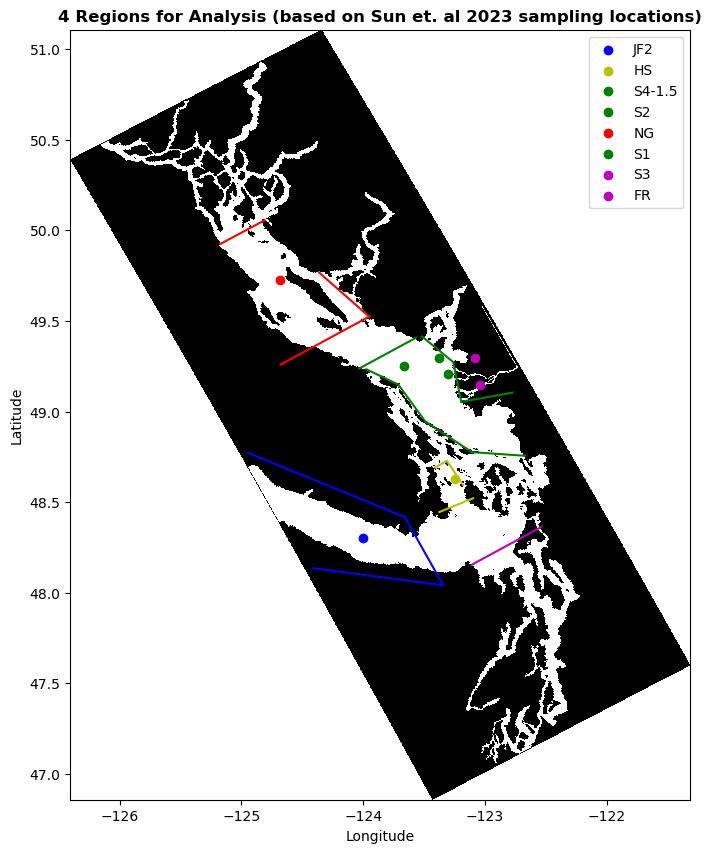

In [8]:
fig, ax = plt.subplots(figsize = (8,10))
#
ax.plot(NSoG_lon_1, NSoG_lat_1, 'r')
ax.plot(NSoG_lon_2, NSoG_lat_2, 'r')
ax.plot(NSoG_lon_3, NSoG_lat_3, 'r')
#
ax.plot(SSoG_lon_1, SSoG_lat_1, 'g')
ax.plot(SSoG_lon_2, SSoG_lat_2, 'g')
ax.plot(SSoG_lon_3, SSoG_lat_3, 'g')
ax.plot(SSoG_lon_4, SSoG_lat_4, 'g')
ax.plot(SSoG_lon_5, SSoG_lat_5, 'g')
ax.plot(SSoG_lon_6, SSoG_lat_6, 'g')
ax.plot(SSoG_lon_7, SSoG_lat_7, 'g')
ax.plot(SSoG_lon_8, SSoG_lat_8, 'g')

#
ax.plot(HS_lon_1, HS_lat_1, 'y')
ax.plot(HS_lon_2, HS_lat_2, 'y')
ax.plot(HS_lon_3, HS_lat_3, 'y')
#
ax.plot(PS_lon, PS_lat, 'm')
#
ax.plot(JdF_lon_1, JdF_lat_1, 'b')
ax.plot(JdF_lon_2, JdF_lat_2, 'b')
ax.plot(JdF_lon_3, JdF_lat_3, 'b')

#
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = 'grey')

#
colors = ['b','y','g','g','r','g','m','m']
for i in range(len(stations)):
    ax.scatter(lon[i], lat[i], c = colors[i], label = stations[i])
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('4 Regions for Analysis (based on Sun et. al 2023 sampling locations)', fontweight = 'bold')

See how to isolate what's inside each box

In [9]:
from shapely.geometry import Polygon, Point

In [10]:
nav_lon = mask['nav_lon']
nav_lat = mask['nav_lat']
tmask = mask['tmask'][0][0]

**Northern Strait Polygon**

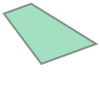

In [11]:
polygon_coords_NSoG = [
    (NSoG_lon_1[0], NSoG_lat_1[0]),
    (NSoG_lon_1[1], NSoG_lat_1[1]),
    (NSoG_lon_2[1], NSoG_lat_2[1]),
    (NSoG_lon_2[0], NSoG_lat_2[0]),
    (NSoG_lon_1[0], NSoG_lat_1[0])
]
polygon_NSoG = Polygon(polygon_coords_NSoG)
polygon_NSoG

**Southern Strait Polygon**

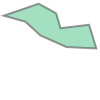

In [12]:
polygon_coords_SSoG = [
    (SSoG_lon_1[0], SSoG_lat_1[0]),
    (SSoG_lon_3[1], SSoG_lat_3[1]),
    (SSoG_lon_4[1], SSoG_lat_4[1]),
    (SSoG_lon_5[1], SSoG_lat_5[1]),
    (SSoG_lon_6[1], SSoG_lat_6[1]),
    (SSoG_lon_8[1], SSoG_lat_8[1]),
    (SSoG_lon_7[1], SSoG_lat_7[1]),
    (SSoG_lon_2[1], SSoG_lat_2[1]),
    (SSoG_lon_2[0], SSoG_lat_2[0]),
    (SSoG_lon_1[0], SSoG_lat_1[0])
]
polygon_SSoG = Polygon(polygon_coords_SSoG)
polygon_SSoG

**Haro Strait Polygon**

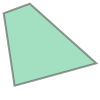

In [13]:
polygon_coords_HS = [
    (HS_lon_1[0], HS_lat_1[0]),
    (HS_lon_2[0], HS_lat_2[0]),
    (HS_lon_2[1], HS_lat_2[1]),
    (HS_lon_1[1], HS_lat_1[1]),
    (HS_lon_1[0], HS_lat_1[0])
]
polygon_HS = Polygon(polygon_coords_HS)
polygon_HS

**Juan de Fuca Strait Polygon**

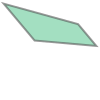

In [14]:
polygon_coords_JdF = [
    (JdF_lon_1[0], JdF_lat_1[0]),
    (JdF_lon_1[1], JdF_lat_1[1]),
    (JdF_lon_2[1], JdF_lat_2[1]),
    (JdF_lon_3[1], JdF_lat_3[1]),
    (JdF_lon_3[1], JdF_lat_3[1]),
    (JdF_lon_1[0], JdF_lat_1[0])
]
polygon_JdF = Polygon(polygon_coords_JdF)
polygon_JdF

In [15]:
def inside_polygon(polygon):
    mask = xr.open_dataset(path['mask'])
    nav_lon = mask['nav_lon']
    nav_lat = mask['nav_lat']
    tmask = mask['tmask'][0][0]
    #
    coordinates_inside = []
    for i in range(nav_lon.shape[0]):
        for j in range(nav_lon.shape[1]):
            point = Point(nav_lon[i, j], nav_lat[i, j])
            if polygon.contains(point) and tmask[i, j] == 1:
                coordinates_inside.append((nav_lon[i, j], nav_lat[i, j]))
    #
    coordinates_inside = np.array(coordinates_inside)
    #
    longitudes = []
    latitudes = []
    for i in range(len(coordinates_inside)):
        longitudes.append(coordinates_inside[i][0])
        latitudes.append(coordinates_inside[i][1])
    #
    return longitudes, latitudes    

In [16]:
lon_NSoG, lat_NSoG = inside_polygon(polygon_NSoG)
lon_SSoG, lat_SSoG = inside_polygon(polygon_SSoG)
lon_HS, lat_HS = inside_polygon(polygon_HS)
lon_JdF, lat_JdF = inside_polygon(polygon_JdF)

/tmp/ipykernel_3396639/3418837105.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(nav_lon, nav_lat,tmask, cmap = 'grey')


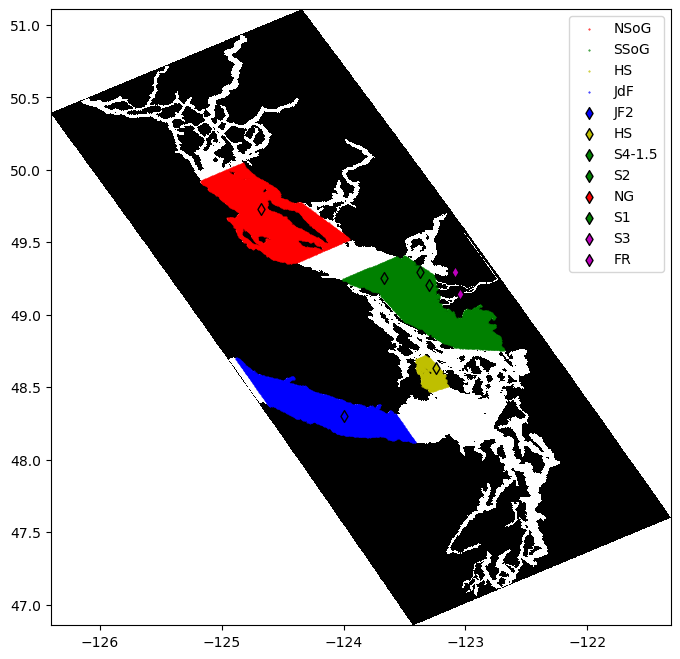

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ax.pcolormesh(nav_lon, nav_lat,tmask, cmap = 'grey')
ax.scatter(lon_NSoG, lat_NSoG, s= .2, color = 'r', label = 'NSoG')
ax.scatter(lon_SSoG, lat_SSoG, s= .2, color = 'g', label = 'SSoG')
ax.scatter(lon_HS, lat_HS, s= .2, color = 'y', label = 'HS')
ax.scatter(lon_JdF, lat_JdF, s= .2, color = 'b', label = 'JdF')
#
colors = ['b','y','g','g','r','g','m','m']
for i in range(len(stations)):
    ax.scatter(lon[i], lat[i], marker = 'd', edgecolors='k', c = colors[i], label = stations[i])
ax.legend()
ax.legend()

**Testing for a monthly run:**

In [18]:
name_file = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Test_runs/PBDEs_run_for_30_days_500_particles_20220101_1n_20220131_1n.zarr'
data = xr.open_zarr(name_file)

In [19]:
def points_inside(polygon, data, t):
    points_inside = []
    status_inside = []
    for i in range(len(data.trajectory)):
        point = Point(data.lon[i,t].values, data.lat[i,t].values)
        if polygon.contains(point):
            points_inside.append((data.lon[i,t].values, data.lat[i,t].values))
            status_inside.append((int(data.status[i,t].values)))
    status_inside = np.array(status_inside)
    #
    longitudes = []
    latitudes = []
    for i in range(len(points_inside)):
        longitudes.append(points_inside[i][0])
        latitudes.append(points_inside[i][1])
    longitudes = np.array(longitudes)
    latitudes = np.array(latitudes)    
    return longitudes, latitudes, status_inside                

In [20]:
tt = 719
long_N, lati_N, status_inside_N = points_inside(polygon_NSoG, data, t = tt)
long_S, lati_S, status_inside_S = points_inside(polygon_SSoG, data, t = tt)
long_H, lati_H, status_inside_H = points_inside(polygon_HS, data, t = tt)
long_J, lati_J, status_inside_J = points_inside(polygon_JdF, data, t = tt)

In [21]:
N_idx_1 = np.where(status_inside_N == 1)
N_idx_2 = np.where(status_inside_N == 2)
N_idx_3 = np.where(status_inside_N == 3)
N_idx_4 = np.where(status_inside_N == 4)
#
S_idx_1 = np.where(status_inside_S == 1)
S_idx_2 = np.where(status_inside_S == 2)
S_idx_3 = np.where(status_inside_S == 3)
S_idx_4 = np.where(status_inside_S == 4)
#
H_idx_1 = np.where(status_inside_H == 1)
H_idx_2 = np.where(status_inside_H == 2)
H_idx_3 = np.where(status_inside_H == 3)
H_idx_4 = np.where(status_inside_H == 4)
#
J_idx_1 = np.where(status_inside_J == 1)
J_idx_2 = np.where(status_inside_J == 2)
J_idx_3 = np.where(status_inside_J == 3)
J_idx_4 = np.where(status_inside_J == 4)

/tmp/ipykernel_3396639/2081316292.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(nav_lon, nav_lat,tmask, cmap = 'grey')


Text(0.5, 1.0, 'Testing Monthly Run (500 Particles)')

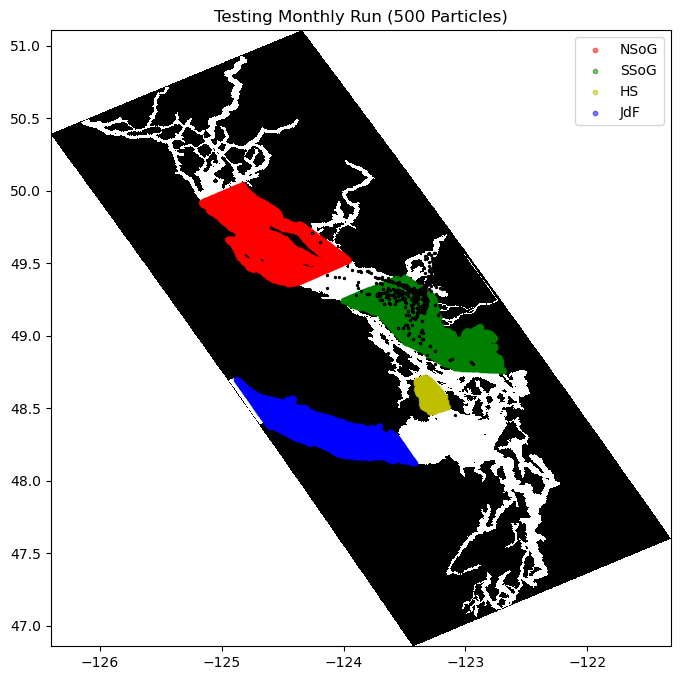

In [31]:
fig, ax = plt.subplots(figsize = (8,8))
ax.pcolormesh(nav_lon, nav_lat,tmask, cmap = 'grey')
ax.scatter(lon_NSoG, lat_NSoG, s= 10, color = 'r',  alpha = .5,  label = 'NSoG')
ax.scatter(lon_SSoG, lat_SSoG, s= 10, color = 'g', alpha = .5, label = 'SSoG')
ax.scatter(lon_HS, lat_HS, s= 10, color = 'y', alpha = .5, label = 'HS')
ax.scatter(lon_JdF, lat_JdF, s= 10, color = 'b', alpha = .5, label = 'JdF')
ax.legend()
#
ax.scatter(data.lon[:,tt],data.lat[:,tt], c = 'k', s=2)
#
ax.scatter(long_N, lati_N, s= 2, c = 'r', edgecolors='k')
ax.scatter(long_S, lati_S, s= 2, c = 'g', edgecolors='k')
ax.scatter(long_H, lati_H, s= 2, c = 'y', edgecolors='k')
ax.scatter(long_J, lati_J, s= 2, c = 'b', edgecolors='k')
#
ax.set_title('Testing Monthly Run (500 Particles)')

**Get the amount of particles that are inside the polygons at every timestep**

In [24]:
amount_SSoG = []
amount_NSoG = []
amount_HS = []
amount_JdF = []
for i in range(len(data.obs)):
    a_SSoG, _ , _ = points_inside(polygon_SSoG, data, t = i)
    a_NSoG, _ , _ = points_inside(polygon_NSoG, data, t = i)
    a_HS, _ , _ = points_inside(polygon_HS, data, t = i)
    a_JdF, _ , _ = points_inside(polygon_JdF, data, t = i)

    amount_NSoG.append(len(a_NSoG))
    amount_SSoG.append(len(a_SSoG))
    amount_HS.append(len(a_HS)) 
    amount_JdF.append(len(a_JdF))   

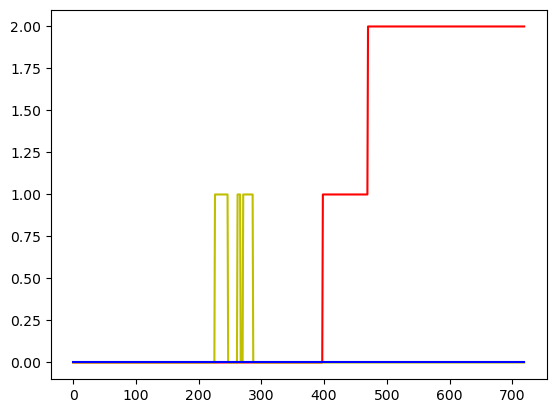

In [26]:
plt.plot(np.arange(0,len(amount_NSoG)),amount_NSoG, 'r')
#plt.plot(np.arange(0,len(amount_SSoG)),amount_SSoG, 'g')
plt.plot(np.arange(0,len(amount_HS)),amount_HS, 'y')
plt.plot(np.arange(0,len(amount_JdF)),amount_JdF, 'b')

Try to get the area of each polygon to get concentrations of particles

In [24]:
from skimage.measure import find_contours
from shapely.geometry import Polygon, MultiPoint
from pyproj import Transformer

In [25]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)  # WGS84 to Web Mercator
projected_coords = [transformer.transform(lon, lat) for lon, lat in polygon_SSoG.exterior.coords]

In [26]:
projected_polygon = Polygon(projected_coords)
area = projected_polygon.area

In [ ]:
area

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Get Tidal Signals for each region**

In [28]:
def get_timestamps(start,length):
    timestamps=[]
    duration = timedelta(days=length)
    for day in range(duration.days):
        timestamps.append([start + timedelta(days=day)])
    return timestamps

In [29]:
begin = datetime(2022, 1, 1) 
end = (datetime(2022, 1, 1) + timedelta(30))
#end = datetime(2016,3,10)
t_len = (end - begin).days
#
dates = get_timestamps(begin,t_len)

In [30]:
def date_files(date, path, prefix_type= 'grid_T.nc'):
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, folder + f'/SalishSea_1h_{date.strftime("%Y%m%d").lower()}_{date.strftime("%Y%m%d").lower()}_{prefix_type}*')
    file_name = glob.glob(prefix) 
    return file_name

In [31]:
path_days_h = '/results2/SalishSea/nowcast-green.202111/'
files_U = []
for i in range(t_len):
    files_U.append(date_files(dates[i][0],path_days_h, prefix_type = 'grid_U.nc'))
    #
files_V = []
for i in range(t_len):
    files_V.append(date_files(dates[i][0],path_days_h, prefix_type = 'grid_V.nc'))

In [33]:
def get_time_series(files_input_U, files_input_V, y_coordinate, x_coordinate, depth = 0, dimension = 'time_counter', variable_U = 'vozocrtx', variable_V = 'vomecrty'):
    #    
    # Set up for depth = 0 (surface)
    data_list_U = []
    data_list_V = []
    time = []
    for i in range(len(files_input_U)):
        datau = xr.open_dataset(files_input_U[i][0])[variable_U][:,depth, y_coordinate, x_coordinate]
        data_list_U.append(datau)
        #
        datav = xr.open_dataset(files_input_V[i][0])[variable_V][:,depth, y_coordinate, x_coordinate]
        data_list_V.append(datav)
        #
        t = xr.open_dataset(files_input_U[i][0])[dimension]
        time.append(t)
    #
    data_series_U = xr.concat(data_list_U, dim = dimension)  
    data_series_V = xr.concat(data_list_V, dim = dimension)
    T = xr.concat(time, dim = dimension) 
    #
    U = pd.DataFrame(data_series_U.values, columns = ['Velocity U'], index=T)
    V = pd.DataFrame(data_series_V.values, columns = ['Velocity V'], index = T)
    return U, V  

In [34]:
# function to get grid point gridX and gridY
#path_NEMO = make_prefix(start,path['NEMO'])
jjii = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [35]:
clat = [49.195045]
clon = [-123.301956]

In [36]:
y, x = finder(clat[0], clon[0])

In [37]:
series_U, series_V = get_time_series(files_U, files_V, y, x)

In [47]:
UV = pd.DataFrame(np.sqrt(series_U['Velocity U'] ** 2 + series_V['Velocity V'] ** 2), columns = ['Velocity UV'])     

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(series_U, 'b')
ax.plot(series_V, 'r')

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Map of Model Domain**

In [10]:
name = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Test_runs/PBDEs_run_for_30_days_500_particles_20220101_1n_20220131_1n.zarr'

In [11]:
from mpl_toolkits.basemap import Basemap
from matplotlib.transforms import Affine2D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from cartopy import crs, feature
import zarr 
import xarray as xr
import numpy as np
#
#
path = {'NEMO': '/results2/SalishSea/nowcast-green.202111/',
'coords': '/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc',
'coordsWW3': '/ocean/vvalenzuela/MOAD/grid2/WW3_grid.nc',
'mask': '/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc',
'bat': '/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc',
'out': '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Test_runs',
'home': '/home/vvalenzuela/MOAD/Ocean_Parcels',
'anim': '/home/vvalenzuela/MOAD/Ocean_Parcels/results/PBDE_runs/animations'}
#
coords = xr.open_dataset(path['coords'], decode_times=False)
mask = xr.open_dataset(path['mask'])
clat = 49.195045
clon = -123.301956

In [ ]:
fig, ax = plt.subplots(figsize = (10,12))
rotation_angle = 10  # Rotation angle in degrees
#
#
w_map = [-126.5, -121, 46.7, 51.3]
# Define a rotated pole projection with a shifted pole to create the rotation effect
m = Basemap(projection='lcc', resolution='h',
            lon_0=clon, lat_0=clat,
            llcrnrlon=w_map[0], urcrnrlon=w_map[1],
            llcrnrlat=w_map[2], urcrnrlat=w_map[3], ax=ax)
#
lons = np.arange(*np.floor([w_map[0], w_map[1] + 1]))
lats = np.arange(*np.floor([w_map[2], w_map[3] + 1]))
#
labels = [[0, 0, 1, 0], [1, 0, 0, 0]]
#
m.drawcoastlines(zorder=1)
m.fillcontinents(color='Burlywood', zorder=0)
m.drawmeridians(lons, color='k',labels = labels[0], yoffset=None, zorder=2)
m.drawparallels(lats, color='k',labels = labels[1], xoffset=None, zorder=2)
m.drawrivers(zorder=2)
#
x, y = m(coords.nav_lon, coords.nav_lat)
#
blevels = list(np.arange(0,500,20))
#
C = ax.contourf(x, y, mask.totaldepth[:,:], zorder=1,cmap = cmap, levels=blevels, extend='both')
ax.contourf(x, y, mask.totaldepth[:,:], [-0.01, 0.01], colors='lightgray', zorder=3)
ax.contour( x, y, mask.totaldepth[:,:], [0], colors='Black', zorder=4)
#
C_lon, C_lat = m(clon, clat)
ax.plot(x[ :,  0], y[ :,  0], 'k-', zorder=6)
ax.plot(x[ :, -1], y[ :, -1], 'k-', zorder=6)
ax.plot(x[ 0,  :], y[ 0,  :], 'k-', zorder=6)
ax.plot(x[-1,  :], y[-1,  :], 'k-', zorder=6)
#
cbar = fig.colorbar(C, ax=ax, location='right', shrink=0.8)
cbar.set_label('Depth [m]')
#
#
ax.text(0.02, 0.01, 'SalishSeaCast Model Domain', transform=ax.transAxes, fontweight = 'bold')
#
ax.text(0.05, 0.25, 'Juan De Fuca Strait\nOpen Boundary', transform=ax.transAxes, fontsize = 13, zorder=3)
ax.arrow(0.20, 0.30,  0.1,  0.070, head_width=0.01, fc='w', ec='b', transform=ax.transAxes, zorder=3)
#
ax.text(0.01, 0.42, 'Johnstone Strait\nOpen Boundary', transform=ax.transAxes, fontsize = 13, zorder=3)
ax.arrow(0.12, 0.47,  0.00,  0.330, head_width=0.01, fc='w', ec='b', transform=ax.transAxes, zorder=3)
#
# IONA
#
ax.plot(C_lon, C_lat, 'ko', markersize=8, markerfacecolor='r', zorder=3)
ax.text(0.560, 0.840, 'Iona Outfall', transform=ax.transAxes, fontsize = 13, zorder=3, fontweight = 'bold')
ax.arrow(0.65, 0.82,  -0.042, -0.260, head_width=0.01, fc='r', ec='k', transform=ax.transAxes, zorder=3)
#
# VANCOUVER
#
V_lon, V_lat = m(-123.10, 49.25)
ax.plot(V_lon, V_lat, 'ko', markersize=8, markerfacecolor='b', zorder=3)
ax.text(0.67, 0.67, 'Vancouver', transform=ax.transAxes, fontsize = 13, zorder=3)
ax.arrow(0.74, 0.66,  -0.082, -0.095, head_width=0.01, fc='b', ec='k', transform=ax.transAxes, zorder=3)
# FRASER RIVER
#
ax.text(0.8, 0.5, 'Fraser River', transform=ax.transAxes, fontsize = 13, zorder=3)
ax.arrow(0.8, 0.52, -0.08, 0.030, head_width=0.01, fc='c', ec='k', transform=ax.transAxes, zorder=3)
#
# SoG
#
ax.text(0.46, 0.46, 'Strait of Georgia', rotation=-40, transform=ax.transAxes, fontsize = 13, zorder=3)
#
# PS
#
ax.text(0.53, 0.110, 'Puget\nSound', transform=ax.transAxes, fontsize = 13, zorder=3)